## Converting Matlab assingment into python code

In [25]:
from __future__ import print_function, division
from builtins import range

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime

from mpl_toolkits.mplot3d import Axes3D  


In [26]:
file_path = r"C:\Users\gprak\Downloads\BITS Courses\CS F464 Machine Learning I\data\data.xlsx"
df = pd.read_excel(file_path,header=None)

In [27]:
df

,0,1,2
0,2.6,1360.00,13.600
1,2.0,1292.25,13.300
2,2.2,1402.00,11.900
3,2.2,1375.50,11.000
4,1.6,1272.25,11.150
...,...,...,...
344,0.7,902.00,9.100
345,0.7,921.25,9.475
346,0.5,858.25,9.325
347,0.5,878.00,9.900


In [28]:
col = list(df.columns)

In [29]:
col

[0, 1, 2]

In [30]:

mu = df.mean(axis=0)
std = df.std(axis=0)
print(mu)
print(std)

0      -6.789971
1    1276.743075
2      14.904799
dtype: float64
0     42.436524
1    249.778577
2      4.712564
dtype: float64


In [31]:
df = (df-mu)/std


In [32]:
df

,0,1,2
0,0.221271,0.333323,-0.276877
1,0.207132,0.062083,-0.340536
2,0.211845,0.501472,-0.637615
3,0.211845,0.395378,-0.828593
4,0.197706,-0.017988,-0.796764
...,...,...,...
344,0.176498,-1.500301,-1.231771
345,0.176498,-1.423233,-1.152197
346,0.171785,-1.675456,-1.184026
347,0.171785,-1.596386,-1.062012


In [33]:
df['ones']=1

In [34]:
cols_x = ['ones',0,1]
cols_y = [2]
X=df[cols_x].values
Y=df[cols_y].values
X_new=X.copy()
Y_new=Y.copy()

In [35]:
# w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))

In [36]:
# w.shape

In [37]:
N,D = X.shape

In [38]:
print(N,D)

349 3


In [39]:
w = np.random.randn(D)/np.sqrt(D)

In [40]:
w=np.array([w]).T
print(w)


[[-0.49872219]
 [ 0.73897944]
 [ 0.63154314]]


## Simple linear regression

In [41]:
print(w.shape)
print(Y.shape)
print(X.shape)

(3, 1)
(349, 1)
(349, 3)


In [42]:
print(X.dot(w).shape)

(349, 1)


In [43]:
learning_rate = 0.001
iterations = 1000
overall_costs=[]
sgd_iters = 100
print(N,D)

349 3


## Applying  SGD to linear regression and getting final weights and bias and forward propagated Yhat and X

In [44]:
W = np.random.randn(D)/np.sqrt(D)
W = np.array([W]).T


W0=W.copy()

xx,yy,zz=[],[],[]

cost_for_plots = []
for i in range(sgd_iters):
    tmpX,tmpY = shuffle(X_new,Y_new)
#     print(tmpX.shape)
#     print(tmpY.shape)
#     break
    costs=[]
    for n in range(N):
        # Step 1: Made predictions
        x = tmpX[n,:].reshape(1,D)
        y = tmpY[n,:].reshape(1,1)
        
#         print(x.shape)
#         print(y.shape)
        
#         break
        Yhat = x.dot(W)
        delta = Yhat-y
    #     print(Yhat.shape)
    #     print(delta.shape)
        # Step 2: Apply convergence rule
    #     print(X.T.dot(delta).shape)
        W = W - learning_rate*x.T.dot(delta)

        mse = np.multiply(delta,delta).sum()/N
        xx.append(W[1])
        yy.append(W[2])
        cost_for_plots.append(mse)
        costs.append(mse)
#     print(f"costs = {costs}")
#     costs=np.array(costs)
    overall_costs.append(costs)
# overall_costs=np.array(overall_costs)
zz=cost_for_plots


In [45]:
print(len(overall_costs))


100


In [46]:
print(len(overall_costs[0]))
print(W.shape)

349
(3, 1)


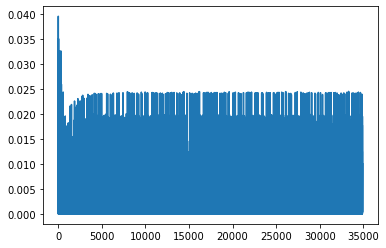

In [47]:
plt.plot(cost_for_plots)
plt.show()

In [48]:
# w1 = np.linspace(-0.4,0.4,num=1000)
# w2 = np.linspace(-0.4,0.4,num=1000)
# J1 = np.zeros((len(w1),len(w2)))
# print(J1.shape)
# print(w1.shape)
# print(w2.shape)

In [49]:
# for i in range(len(w1)):
#     for j in range((len(w2))):
#         W1 = np.array([0,w1[i],w2[i]])
#         Yhat = x.dot(W1)
#         delta = Yhat-y
#         J1[i,j] = np.multiply(delta,delta).sum()/N

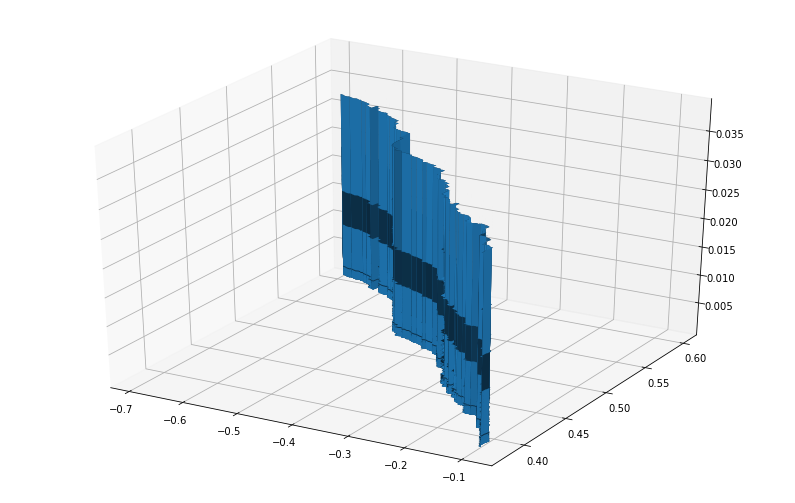

In [62]:
# xx,yy=w1,w2
xxx,yyy,zzz=np.array(yy[:1000]),np.array(xx[:1000]),np.array([zz[:1000]])
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(xxx, yyy, zzz)
 
# Xgrid = np.vstack((xxx.flatten(),yyy.flatten())).T
# plt.scatter(Xgrid[:,0],Xgrid[:,1])
# fig=plt.figure()
# ax=fig.add_subplot(111,projection='3d')

# ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],zzz,linewidth = 0.2,antialiased=True)

## Original linear regression without SGD

In [450]:

costs=[]
for t in range(iterations):
  # update w
    Yhat = X.dot(w)
#     print(Yhat.shape)
    delta = Yhat - Y
#     print(delta.shape)
    w = w - learning_rate*X.T.dot(delta)
#     print(X.T.dot(delta).shape)
    
    # find and store the cost
    mse = np.multiply(delta,delta).sum() / N
#     print(mse)
    costs.append(mse)


'\ncosts=[]\nfor t in range(iterations):\n  # update w\n    Yhat = X.dot(w)\n#     print(Yhat.shape)\n    delta = Yhat - Y\n#     print(delta.shape)\n    w = w - learning_rate*X.T.dot(delta)\n#     print(X.T.dot(delta).shape)\n    \n    # find and store the cost\n    mse = np.multiply(delta,delta).sum() / N\n#     print(mse)\n    costs.append(mse)\n'

## Costs convergence plot after single Gradient Descent

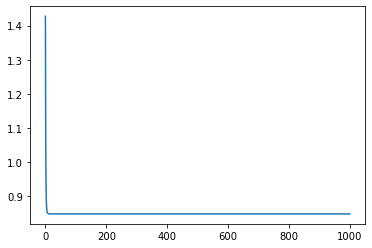

In [353]:
plt.plot(costs)
plt.show()

final w: [[1.14419994e-15]
 [7.80690785e-02]
 [3.60550959e-01]]


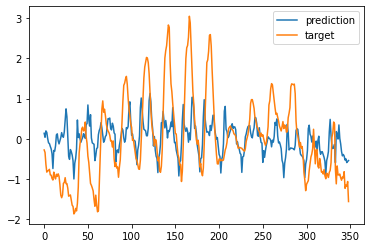

In [225]:
print("final w:", w)

# plot prediction vs target
plt.plot(Yhat, label='prediction')
plt.plot(Y, label='target')
plt.legend()
plt.show()

In [228]:
# from __future__ import print_function, division
# from builtins import range
# # Note: you may need to update your version of future
# # sudo pip install -U future


# import numpy as np
# import matplotlib.pyplot as plt

# N = 10
# D = 3
# X = np.zeros((N, D))
# X[:,0] = 1 # bias term
# X[:5,1] = 1
# X[5:,2] = 1
# Y = np.array([0]*5 + [1]*5)

# # print X so you know what it looks like
# print("X:", X)
# print(X.shape)
# # won't work!
# # w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))

# # let's try gradient descent
# costs = [] # keep track of squared error cost
# w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
# print(w.shape)
# learning_rate = 0.001
# for t in range(1000):
#   # update w
#     Yhat = X.dot(w)
#     print(Yhat.shape)
#     delta = Yhat - Y
#     print(delta.shape)
#     w = w - learning_rate*X.T.dot(delta)
#     print(X.T.dot(delta).shape)
    
#     # find and store the cost
#     mse = delta.dot(delta) / N
#     print(mse)
#     break
#     costs.append(mse)